In [1]:
import datetime
from pathlib import Path
import os

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
import seaborn as sns

## Configuraciones de Variables

Definimos una ruta de directorio base

In [3]:
BASE_FILE_DIR = Path("temp")

creamos un string que luego podemos editar a gusto con el método `.format()`

In [4]:
file_path_crib = 'data/{category}/{year}-{month:02d}/{province}-{day:02d}-{month:02d}-{year}.csv'

Creamos una lista e diccionarios que contengan diccionarios con claves `name` y `url` de cada una de las dataset a extraer

In [5]:
categories = [
    {
        "name": "pharmacies",
        "url": "http://datos.salud.gob.ar/dataset/39117f8f-e2bc-4571-a572-15a6ce7ea9e1/resource/19338ea7-a492-4af3-b212-18f8f4af9184/download/establecimientos-farmacias-enero-2021.csv"
    }
]

## Farmacias

In [6]:
farmacias = categories[0]
farmacias

{'name': 'pharmacies',
 'url': 'http://datos.salud.gob.ar/dataset/39117f8f-e2bc-4571-a572-15a6ce7ea9e1/resource/19338ea7-a492-4af3-b212-18f8f4af9184/download/establecimientos-farmacias-enero-2021.csv'}

In [7]:
r = requests.get(farmacias["url"])
r

<Response [200]>

In [8]:
r.encoding = 'utf-8'

In [9]:
now = datetime.datetime.now()
now

datetime.datetime(2022, 10, 14, 11, 22, 37, 573254)

In [10]:
file_path = file_path_crib.format(
    category=farmacias["name"],
    year=now.year,
    month=now.month,
    day=now.day,
    province="Argentina"
)
file_path

'data/pharmacies/2022-10/Argentina-14-10-2022.csv'

In [11]:
farmacias_path = BASE_FILE_DIR / file_path
farmacias_path

PosixPath('temp/data/pharmacies/2022-10/Argentina-14-10-2022.csv')

In [12]:
farmacias_path.parent.mkdir(parents=True, exist_ok=True)

In [13]:
with open(farmacias_path, "w") as f:
    f.write(r.text)

## Transform

In [14]:
df = pd.read_csv(farmacias_path)
df.head()

,establecimiento_id,establecimiento_nombre,localidad_id,localidad_nombre,provincia_id,provincia_nombre,departamento_id,departamento_nombre,cod_loc,cod_ent,origen_financiamiento,tipologia_id,tipologia_nombre,tipologia,cp,domicilio,sitio_web
0,70260072329721,PUJOL,26007020000,PUERTO MADRYN,26,CHUBUT,7,BIEDMA,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,9120,LOS MAITENES 1538,NaN
1,70100352324743,SALUDFARMA,10035020000,BELEN,10,CATAMARCA,35,BELÉN,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,4750,Mitre 14,NaN
2,70064412318286,MARSICO,6441030015,LA PLATA,6,BUENOS AIRES,441,LA PLATA,30,15.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,1900,Avenida 7 445,NaN
3,70340492347884,PERALTA HNOS,34049010000,CLORINDA,34,FORMOSA,49,PILCOMAYO,10,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,3610,Avenida San Martin 470,NaN
4,70140142334991,VALENTINO,14014010000,CORDOBA,14,CÓRDOBA,14,CAPITAL,10,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,5000,Catamarca 1047,NaN


In [15]:

df.isnull().sum()

establecimiento_id            0
establecimiento_nombre        0
localidad_id                  0
localidad_nombre              0
provincia_id                  0
provincia_nombre              0
departamento_id               0
departamento_nombre           0
cod_loc                       0
cod_ent                     384
origen_financiamiento         0
tipologia_id                  0
tipologia_nombre              0
tipologia                     0
cp                            0
domicilio                     0
sitio_web                 13633
dtype: int64

In [16]:
df.columns

Index(['establecimiento_id', 'establecimiento_nombre', 'localidad_id',
       'localidad_nombre', 'provincia_id', 'provincia_nombre',
       'departamento_id', 'departamento_nombre', 'cod_loc', 'cod_ent ',
       'origen_financiamiento', 'tipologia_id', 'tipologia_nombre',
       'tipologia', 'cp', 'domicilio', 'sitio_web'],
      dtype='object')

Renombrar las columnas

In [17]:
renamed_cols = {
    'establecimiento_id': 'id',
    'establecimiento_nombre': 'name',
    'domicilio':'adress',
    'localidad_id': 'id_location',
    'localidad_nombre': 'location',
    'provincia_id': 'id_province',
    'provincia_nombre': 'province',
    'departamento_id': 'id_department',
    'departamento_nombre': 'department',
    'cod_loc': 'cod_location',
    'tipologia_id': 'id_tipology',
    'tipologia_nombre': 'tipology',
    'cp': 'postal_code',
    'sitio_web': 'webpage',
}

In [18]:
df = df.rename(columns = renamed_cols)

In [19]:
df.columns
df.set_index("id")

,name,id_location,location,id_province,province,id_department,department,cod_location,cod_ent,origen_financiamiento,id_tipology,tipology,tipologia,postal_code,adress,webpage
id,,,,,,,,,,,,,,,,
70260072329721,PUJOL,26007020000,PUERTO MADRYN,26,CHUBUT,7,BIEDMA,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,9120,LOS MAITENES 1538,NaN
70100352324743,SALUDFARMA,10035020000,BELEN,10,CATAMARCA,35,BELÉN,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,4750,Mitre 14,NaN
70064412318286,MARSICO,6441030015,LA PLATA,6,BUENOS AIRES,441,LA PLATA,30,15.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,1900,Avenida 7 445,NaN
70340492347884,PERALTA HNOS,34049010000,CLORINDA,34,FORMOSA,49,PILCOMAYO,10,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,3610,Avenida San Martin 470,NaN
70140142334991,VALENTINO,14014010000,CORDOBA,14,CÓRDOBA,14,CAPITAL,10,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,5000,Catamarca 1047,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70460212355713,FARMACOST,46021020000,ANILLACO,46,LA RIOJA,21,CASTRO BARROS,20,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,5301,Coronel Nicolas Barros s/n Barrio Virgen del F...,NaN
70421472354613,FARMACIA MUSSO,42147030000,TRENEL,42,LA PAMPA,147,TRENEL,30,0.0,Privado,70,FARMACIA,Farmacia ambulatoria comercial,6369,9 DE JULIO 545,NaN
70940142195567,FARMACIA- HOSPITAL REGIONAL USHUAIA,94014020000,USHUAIA,94,TIERRA DEL FUEGO,14,USHUAIA,20,0.0,Provincial,70,FARMACIA,Farmacia en Establecimiento de Salud,9410,12 de octubre 65,NaN


In [20]:
cols = [
    'id',
    'name',
    'id_location',
    'location',
    'id_province',
    'province',
    'id_department',
    'department',
    'postal_code',
    'adress',
    'webpage',
]

In [21]:
df = df[cols]
df

,id,name,id_location,location,id_province,province,id_department,department,postal_code,adress,webpage
0,70260072329721,PUJOL,26007020000,PUERTO MADRYN,26,CHUBUT,7,BIEDMA,9120,LOS MAITENES 1538,NaN
1,70100352324743,SALUDFARMA,10035020000,BELEN,10,CATAMARCA,35,BELÉN,4750,Mitre 14,NaN
2,70064412318286,MARSICO,6441030015,LA PLATA,6,BUENOS AIRES,441,LA PLATA,1900,Avenida 7 445,NaN
3,70340492347884,PERALTA HNOS,34049010000,CLORINDA,34,FORMOSA,49,PILCOMAYO,3610,Avenida San Martin 470,NaN
4,70140142334991,VALENTINO,14014010000,CORDOBA,14,CÓRDOBA,14,CAPITAL,5000,Catamarca 1047,NaN
...,...,...,...,...,...,...,...,...,...,...,...
13672,70460212355713,FARMACOST,46021020000,ANILLACO,46,LA RIOJA,21,CASTRO BARROS,5301,Coronel Nicolas Barros s/n Barrio Virgen del F...,NaN
13673,70421472354613,FARMACIA MUSSO,42147030000,TRENEL,42,LA PAMPA,147,TRENEL,6369,9 DE JULIO 545,NaN
13674,70940142195567,FARMACIA- HOSPITAL REGIONAL USHUAIA,94014020000,USHUAIA,94,TIERRA DEL FUEGO,14,USHUAIA,9410,12 de octubre 65,NaN
13675,70420702154608,FARMACIA INSTITUCIONAL E.A. MANUEL FREIRE,42070030000,GUATRACHE,42,LA PAMPA,70,GUATRACHÉ,6309,Primera Junta Nº 158,NaN


In [22]:
provinces = df['province'].value_counts().keys()
total_farmacias = df['province'].value_counts().values

In [23]:
provinces

Index(['BUENOS AIRES', 'SANTA FE', 'CABA', 'TUCUMÁN', 'MISIONES', 'CÓRDOBA',
       'ENTRE RÍOS', 'CHACO', 'SALTA', 'CORRIENTES', 'RÍO NEGRO', 'LA PAMPA',
       'SANTIAGO DEL ESTERO', 'SAN LUIS', 'SAN JUAN', 'NEUQUÉN', 'CHUBUT',
       'JUJUY', 'CATAMARCA', 'FORMOSA', 'LA RIOJA', 'SANTA CRUZ',
       'TIERRA DEL FUEGO', 'MENDOZA'],
      dtype='object')

In [24]:
df_provincias = pd.DataFrame(
    {
        "Provinces": provinces,
        "Total_Pharms": total_farmacias
    }
)
df_provincias

,Provinces,Total_Pharms
0,BUENOS AIRES,5053
1,SANTA FE,1778
2,CABA,1024
3,TUCUMÁN,611
4,MISIONES,594
5,CÓRDOBA,566
6,ENTRE RÍOS,489
7,CHACO,426
8,SALTA,337
9,CORRIENTES,303


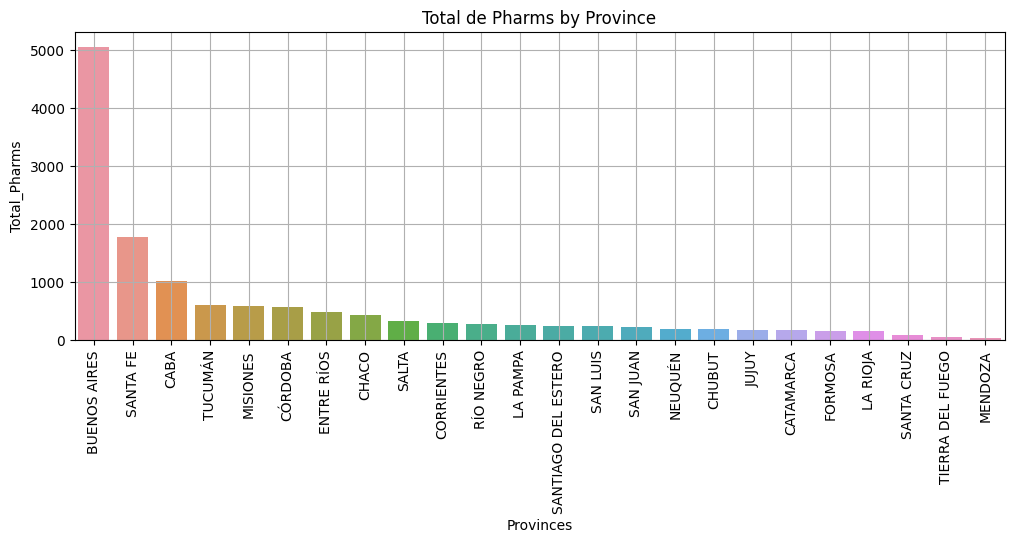

In [25]:
# barplot of all the features
fig = plt.figure(figsize = (12,4))
sns.barplot(x = 'Provinces', y = 'Total_Pharms', data = df_provincias)
plt.xticks(rotation=90) 
plt.grid()
plt.title("Total de Pharms by Province")
plt.show()

In [26]:
# Get pharms by province
def pharms_by_province(province):
    df_province =  df[df["province"]==province]
    return df_province

In [27]:
# Get all pharms by department in some province
def pharms_by_department(province):
    df_province =  pharms_by_province(province=province)
    df_department = df_province['department'].value_counts().keys()
    total_pharms_by_department = df_province['department'].value_counts().values
    df_pharms_by_department = pd.DataFrame(
        {
            "Departments": df_department,
            "Total_Pharms_by_Department": total_pharms_by_department
        }
    )
    return df_pharms_by_department

In [28]:
"""
--------------------------------------
Index |  Province
--------------------------------------
0	  |  BUENOS AIRES
1	  |  SANTA FE
2	  |  CABA
3	  |  TUCUMÁN
4	  |  MISIONES
5	  |  CÓRDOBA
6	  |  ENTRE RÍOS
7	  |  CHACO
8	  |  SALTA
9	  |  CORRIENTES
10	  |  RÍO NEGRO
11	  |  LA PAMPA
12	  |  SANTIAGO DEL ESTERO
13	  |  SAN LUIS
14	  |  SAN JUAN
15	  |  NEUQUÉN
16	  |  CHUBUT
17	  |  JUJUY
18	  |  CATAMARCA
19	  |  FORMOSA
20	  |  LA RIOJA
21	  |  SANTA CRUZ
22	  |  TIERRA DEL FUEGO
23	  |  MENDOZA
--------------------------------------
"""
index = 19
province_name_by_index = provinces[index] # Index = 6, province = "CÓRDOBA"
df_province = pharms_by_province(province_name_by_index)
df_province.head()

,id,name,id_location,location,id_province,province,id_department,department,postal_code,adress,webpage
3,70340492347884,PERALTA HNOS,34049010000,CLORINDA,34,FORMOSA,49,PILCOMAYO,3610,Avenida San Martin 470,NaN
11,70340282347858,JUAREZ,34028010000,INGENIERO GUILLERMO N. JUAREZ,34,FORMOSA,28,MATACOS,3636,calle Saavedra y Tucumán,NaN
9571,70340492347860,INSFRAN,34049020000,LAGUNA BLANCA,34,FORMOSA,49,PILCOMAYO,3613,calle Aldo Bollini y Sorrento Critelli,NaN
9593,70340492347840,LUCY-MAR,34049010000,CLORINDA,34,FORMOSA,49,PILCOMAYO,3610,Avenida San Martín 1221,NaN
9594,70340492347856,SAN CARLOS ANEXO I,34049010000,CLORINDA,34,FORMOSA,49,PILCOMAYO,3610,Avenida San Martín 449,NaN


In [29]:

df_pharms_by_department = pharms_by_department(province_name_by_index)
df_pharms_by_department

,Departments,Total_Pharms_by_Department
0,FORMOSA,79
1,PILCOMAYO,41
2,PIRANÉ,23
3,PATIÑO,14
4,MATACOS,3
5,PILAGÁS,2


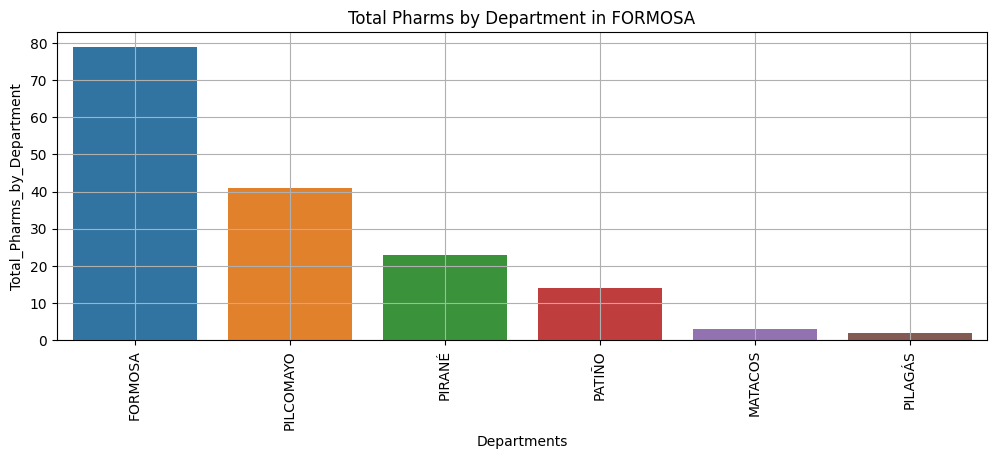

In [30]:
# barplot of all the features
fig = plt.figure(figsize = (12,4))
sns.barplot(x = 'Departments', y = 'Total_Pharms_by_Department', data = df_pharms_by_department)
plt.xticks(rotation = 90) 
plt.grid()
plt.title(f"Total Pharms by Department in {province_name_by_index}")
plt.show()

Derive Additional Features

In [31]:
# population in percent
sum_pop = df_pharms_by_department['Total_Pharms_by_Department'].sum()
print('Overall population: ',sum_pop)

Overall population:  162


In [32]:
# population in percent
sum_pop = df_pharms_by_department['Total_Pharms_by_Department'].sum()/df_provincias['Total_Pharms'].sum()
print('Overall population: ', sum_pop)

Overall population:  0.011844702785698618


In [33]:
file_path = file_path_crib.format(
    category = farmacias["name"],
    year = now.year,
    month = now.month,
    day = now.day,
    province = f"pharmacies_{province_name_by_index.lower().replace(' ', '_')}",
)
file_path

'data/pharmacies/2022-10/pharmacies_formosa-14-10-2022.csv'

In [34]:
province_path = BASE_FILE_DIR / file_path
province_path

PosixPath('temp/data/pharmacies/2022-10/pharmacies_formosa-14-10-2022.csv')

In [35]:
# save data frame in CSV file
df_province.to_csv(province_path)